### Iris Classification

Importing and preperation of data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
dataset = pd.read_csv('sample_data/Iris.csv')

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [7]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

Spliting dataset into training set and test set

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [9]:
from sklearn.model_selection import train_test_split #Need to change to from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### KNN for classification

In [10]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [11]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

#### Evaluating predictions

Building confusion matrix:

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy:

In [13]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of k-NN model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of k-NN model is equal 96.67 %.


Decision Tree for classification

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [15]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

[Text(0.5, 0.9166666666666666, 'node #0\nX[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = y[2]'),
 Text(0.4230769230769231, 0.75, 'node #1\ngini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = y[0]'),
 Text(0.5769230769230769, 0.75, 'node #2\nX[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = y[2]'),
 Text(0.3076923076923077, 0.5833333333333334, 'node #3\nX[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = y[1]'),
 Text(0.15384615384615385, 0.4166666666666667, 'node #4\nX[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = y[1]'),
 Text(0.07692307692307693, 0.25, 'node #5\ngini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = y[1]'),
 Text(0.23076923076923078, 0.25, 'node #6\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = y[2]'),
 Text(0.46153846153846156, 0.4166666666666667, 'node #7\nX[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = y[2]'),
 Text(0.38461538461538464, 0.25, 'node #8\ngi

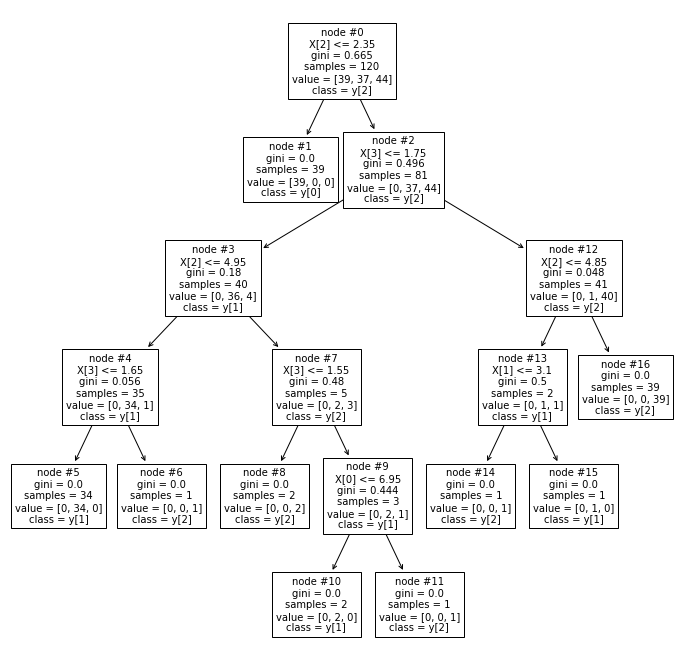

In [16]:
plt.figure(figsize=(12,12))
plot_tree(tree, class_names=True, node_ids=True, fontsize=10)

[Text(0.5, 0.9166666666666666, 'PetalLengthCm <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.5769230769230769, 0.75, 'PetalWidthCm <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(0.3076923076923077, 0.5833333333333334, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'PetalWidthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginic

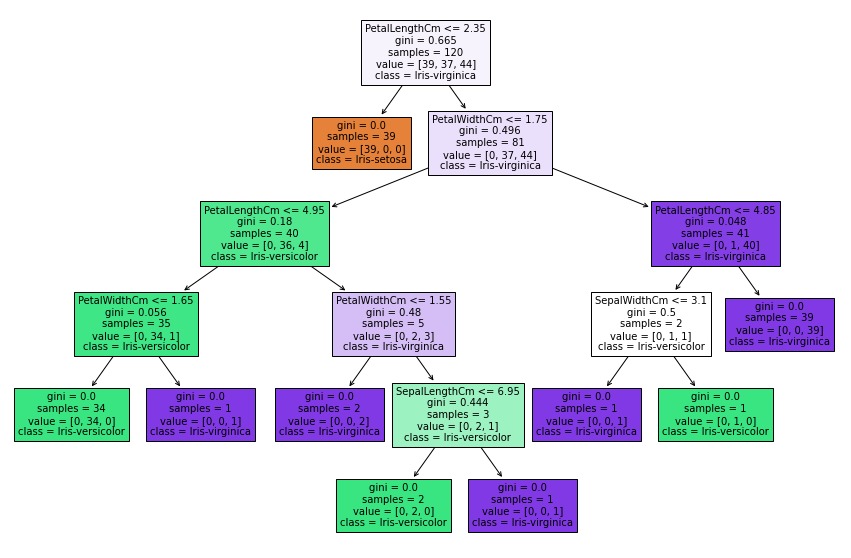

In [17]:
plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm'], 
          class_names=tree.classes_, filled=True, fontsize=10)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of decision tree model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of decision tree model is equal 100.0 %.


Neural Networks for Classiciation

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=[10,10], max_iter=1000)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Neural Networks model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of Neural Networks model is equal 100.0 %.


### k-fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knnClassifier, X, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f}')
print(f'Standard Deviation:{scores.std():.3f}')

Accuracy scores of each fold:  ['0.967', '0.967', '0.933', '0.967', '1.000']
Accuracy: 0.967
Standard Deviation:0.021


In [ ]:
scores

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [ ]:
scores.mean()

0.9666666666666668

In [ ]:
scores.std()

0.02108185106778919

In [ ]:
treeClassifier = DecisionTreeClassifier()
scores = cross_val_score(treeClassifier, X, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f}')
print(f'Standard Deviation:{scores.std():.3f}')

Accuracy scores of each fold:  ['0.967', '0.967', '0.900', '1.000', '1.000']
Accuracy: 0.967
Standard Deviation:0.037


In [ ]:
neuralnetClassifier = MLPClassifier(random_state=1, hidden_layer_sizes=[10,10], max_iter=1000)
scores = cross_val_score(neuralnetClassifier, X, y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f}')
print(f'Standard Deviation:{scores.std():.3f}')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy scores of each fold:  ['1.000', '0.967', '0.967', '0.900', '1.000']
Accuracy: 0.967
Standard Deviation:0.037


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
